In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('salarydata.csv')
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'salarydata.csv'

In [ ]:
df.replace({'?':'Others'},inplace=True)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Others,227026,HS-grad,9,Never-married,Others,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


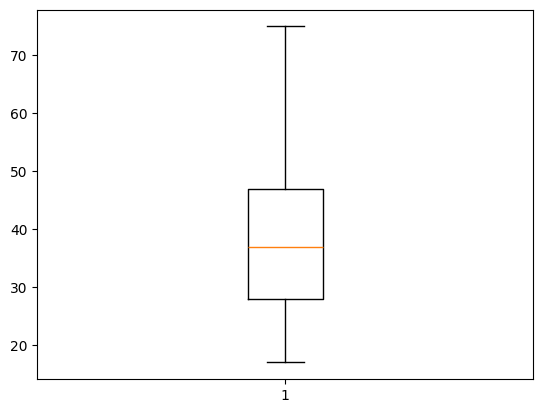

In [ ]:
df['age'].value_counts()
df=df[(df['age']<=75)&(df['age']>=17)]
plt.boxplot(df['age'])
plt.show()

In [ ]:
df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-worked']
df['workclass'].value_counts()
df.shape

(48438, 15)

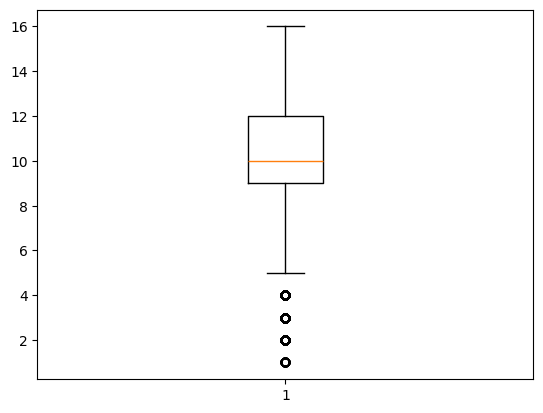

In [ ]:
df['education'].value_counts()
plt.boxplot(df['educational-num'])
plt.show()
df=df[(df['educational-num']<=16)&(df['educational-num']>=5)]

In [ ]:
df['educational-num'].value_counts()
df=df.drop(columns=['education'])

In [ ]:
encoder = LabelEncoder()
df['workclass'] = encoder.fit_transform(df['workclass']) 
df['marital-status'] = encoder.fit_transform(df['marital-status'])   
df['occupation'] = encoder.fit_transform(df['occupation'])
df['relationship'] = encoder.fit_transform(df['relationship'])    
df['race'] = encoder.fit_transform(df['race'])  
df['gender'] = encoder.fit_transform(df['gender'])    
df['native-country'] = encoder.fit_transform(df['native-country'])


In [ ]:
df.head(10)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
5,34,3,198693,6,4,7,1,4,1,0,0,30,39,<=50K
6,29,2,227026,9,4,8,4,2,1,0,0,40,39,<=50K
7,63,5,104626,15,2,10,0,4,1,3103,0,32,39,>50K
8,24,3,369667,10,4,7,4,4,0,0,0,40,39,<=50K
10,65,3,184454,9,2,6,0,4,1,6418,0,40,39,>50K


In [ ]:
x=df.drop(columns=['income'])
y=df['income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    


LogisticRegression Accuracy: 0.8151
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7010
        >50K       0.70      0.46      0.55      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.80      0.82      0.80      9344

RandomForest Accuracy: 0.8504
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.74      0.61      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.84      0.85      0.85      9344

KNN Accuracy: 0.8243
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7010
        >50K       0.67      0.60      0.63      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.75      0.

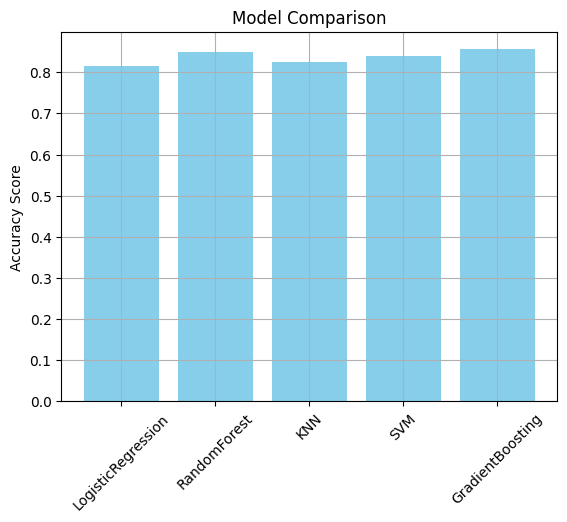

In [ ]:
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")


best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
joblib.dump(best_model, "best_model.pkl")
print("Saved best model as best_model.pkl")


LogisticRegression: 0.7851
RandomForest: 0.8510
KNN: 0.7708
SVM: 0.7884
GradientBoosting: 0.8557

Best model: GradientBoosting with accuracy 0.8557
Saved best model as best_model.pkl
